# Machine Learning Pipelines With Scikit-Learn


#### 기계 학습 워크플로우(Workflow)는 데이터 준비 (예 : 누락된 값 처리, 크기 조정, 인코딩, 특징 추출)의 여러 단계로 구성됩니다. 
#### 워크플로우는 작업 절차를 통한 정보 또는 업무의 이동을 의미하며, 작업 흐름이라고도 부른다. 
#### 더 자세히 말해, 워크플로우는 작업 절차의 운영적 측면이다
#### 이 워크플로우를 처음 학습 할 때 데이터 준비를 한 번에 한 단계씩 수행합니다. 
#### 학습 및 테스트 데이터 모두에 대한 준비 단계를 수행해야하므로 시간이 많이 걸릴 수 있습니다. 
#### 파이프 라인을 사용하면 준비 단계를 컴파일하고 모델 튜닝 및 모니터링 작업을 용이하게 하여 이 프로세스를 간소화 할 수 있습니다. 
#### Scikit-Learn의 Pipeline 클래스는 일련의 데이터 변환을 적용한 후 추정기를 적용하기 위한 구조를 제공합니다(Mayo, 2017). 
#### 더 자세한 개요를 보려면 설명서를 살펴보십시오. 파이프 라인을 구현하면 다음과 같은 많은 이점이 있습니다.

* 편의성 및 캡슐화 : 전체 추정자 시퀀스에 맞추기 위해 데이터에 대해 fit을 호출하고 예측합니다.
* 공동 매개 변수 선택 : 파이프 라인에있는 모든 추정기의 매개 변수에 대해 그리드 검색을 수행 할 수 있습니다.
* 교차 검증 : 파이프 라인은 교차 검증 중에 테스트 데이터에서 훈련 된 모델로의 데이터 유출을 방지하는 데 도움이됩니다. 
* 이는 변환기와 예측 변수를 훈련시키는 데 동일한 샘플이 사용되도록함으로써 가능합니다.

In [1]:
# Standard Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Transformers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [3]:
# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
from IPython.display import display, Markdown

In [4]:
# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [5]:
# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [6]:
# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## 문제의 정의는 타이타닉호를 승선한 승객의 특성에 따라 생존여부를 예측하는 모델을 만드는 것

In [7]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 타이타닉 변수설명
<img src="titanic_var_desc.png">

In [8]:
df.isna().sum() # 속성누락 수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isna().sum() / df.shape[0] ## 속성누락 비율

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
df.info()

# Name, Sex, Ticket, Cabin, Embarked는 문자열 변수이고 나머지는 수치형 변수임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# 영향이 적을 것 같은 변수는 삭제, 여기시 inplace는 df자료에 바로 적응되어 내용이 바뀜
# 그렇지 않으면 바뀐 내용이 임시적임
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
df.isna().sum() / df.shape[0] *100 ## 속성누락 비율

# 속성누락율을 보면 Age연령 속성이 19.8%이고 Embared 속성이 0.22%로 나타났다.

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [14]:
# 승선부두와 관련된 embarked 속성의 누락치는 가장 빈도가 높인 부두로 처환할 것임
# 승선한 부두중 S 부두를 72% 이용한 것으로 나타나 이 값으로 누락값을 치환함.

In [15]:
df['Embarked'].value_counts() / len(df['Embarked'])

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [16]:
df.Embarked = df.Embarked.fillna(value='S')

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [18]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
# Age 속성은 평균값으로 치환
df.Age.mean()

29.69911764705882

In [20]:
df.Age=df.Age.fillna(value = df.Age.mean())

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [24]:
columns = ['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
numerical_columns = ['Age', 'Fare']
categorical_columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

In [25]:
for cat in categorical_columns:
    d =df[cat].value_counts()
    print(d.sort_values())

2    184
1    216
3    491
Name: Pclass, dtype: int64
female    314
male      577
Name: Sex, dtype: int64
5      5
8      7
3     16
4     18
2     28
1    209
0    608
Name: SibSp, dtype: int64
6      1
4      4
5      5
3      5
2     80
1    118
0    678
Name: Parch, dtype: int64
Q     77
C    168
S    646
Name: Embarked, dtype: int64


In [26]:
df.loc[df["SibSp"] == 8, ["SibSp"]] = 6

In [27]:
df = df[df.Parch != 6]

#Creating ss transformer to scale the continuous numerical data with StandardScaler()
# 연속형 수치자료를 표준화하기 위한  StandardScale()변환기 설정

In [28]:
ss = Pipeline(steps=[('ss', StandardScaler())])

# 범주형 자료를 수치형으로 변환하기 위한 OneHotEncoder()변환기 설정

In [29]:
ohe = Pipeline(steps=[('ohe', OneHotEncoder())])

#Creating preprocess column transformer to combine the ss and ohe pipelines
# 변환기를 이용해서 실제 해당하는 수치형변수와 범주형 변수의 속성들을 변환하기위한 전처리 함수 설정

In [30]:
preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, numerical_columns),
                        ('cat', ohe, categorical_columns)
                    ])

In [31]:
preprocess

ColumnTransformer(transformers=[('cont',
                                 Pipeline(steps=[('ss', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('ohe', OneHotEncoder())]),
                                 ['Pclass', 'Sex', 'SibSp', 'Parch',
                                  'Embarked'])])

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# 모델 평가함수 정의
## 참값 y와 예측값 y_hat를 입력변수로 받아서
## 정밀도, 재현율, 정확도, f1점수를 반환한다.

In [33]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap='PuBu', annot=True, fmt='g', annot_kws={'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)    
    plt.show();

# 학습자료외 테스트 자료를 분할하기

In [34]:
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df.Survived

In [35]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [36]:
y = LabelEncoder().fit_transform(y)  # datafrmae 자료가 ndarray 형태의 자료로 변환됨

In [37]:
y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [38]:
## t기본값은 est_size가 25%임
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
X_train.shape, X_test.shape

((667, 7), (223, 7))

In [40]:
y_train.shape, y_test.shape

((667,), (223,))

# Cross Validation 검정함수

In [78]:
def cross_validate(classifier, cv):
    pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', classifier)
    ])
    train_acc = []
    test_acc = []
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        pipeline.fit(X_t, y_t)
        y_hat_t = pipeline.predict(X_t)
        train_acc.append(accuracy_score(y_t, y_hat_t))
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
#         pipeline.fit(X_val, y_val)
        y_hat_val = pipeline.predict(X_val)
        test_acc.append(accuracy_score(y_val, y_hat_val))
    print(evaluation(y_val, y_hat_val))
    print('Training Accuracy: {}'.format(np.mean(train_acc)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_acc)))
    print('\n')

Recall:  0.6976744186046512
Accuracy:  0.8345864661654135
Precision:  0.7692307692307693
F1:  0.7317073170731708


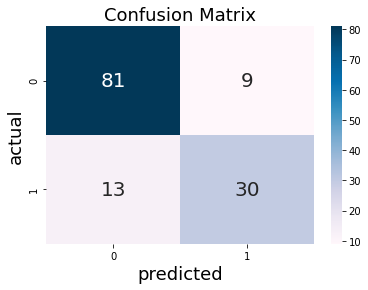

None
Training Accuracy: 0.9857565472802523


Validation Accuracy: 0.7540792279205476




In [79]:
cross_validate(DecisionTreeClassifier(), KFold())

Recall:  0.7441860465116279
Accuracy:  0.8045112781954887
Precision:  0.6808510638297872
F1:  0.711111111111111


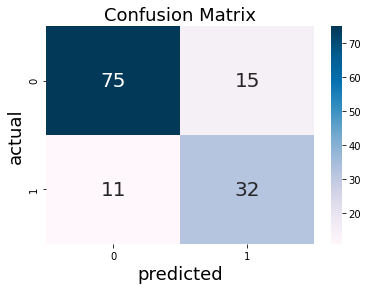

None
Training Accuracy: 0.8481986634905242


Validation Accuracy: 0.7839973066995848




In [80]:
cross_validate(KNeighborsClassifier(), KFold())

Recall:  0.7674418604651163
Accuracy:  0.8421052631578947
Precision:  0.75
F1:  0.7586206896551724


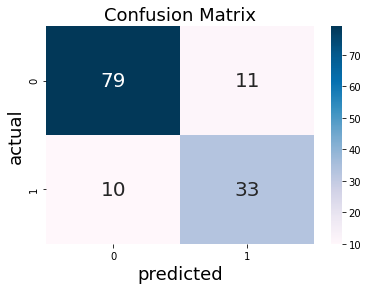

None
Training Accuracy: 0.9857565472802523


Validation Accuracy: 0.7841768600605993




In [81]:
cross_validate(RandomForestClassifier(), KFold())

Recall:  0.7674418604651163
Accuracy:  0.8571428571428571
Precision:  0.7857142857142857
F1:  0.7764705882352941


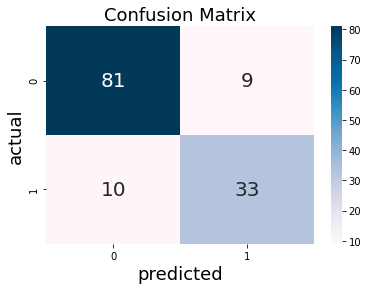

None
Training Accuracy: 0.8354533381116006


Validation Accuracy: 0.8200426439232409




In [82]:
cross_validate(SVC(), KFold())

In [83]:

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6,  min_samples_split=2,  min_samples_leaf=1)



Recall:  0.6976744186046512
Accuracy:  0.8270676691729323
Precision:  0.75
F1:  0.7228915662650603


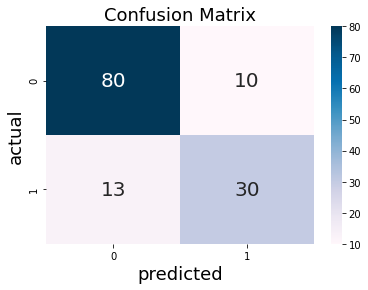

None
Training Accuracy: 0.8688105627815137


Validation Accuracy: 0.8095275502188306




In [84]:
cross_validate(clf, KFold())

# GRID SEARCH 함수를 정의해서 하이퍼파라미터 최적화

### 주의사항

* 그리드서치함수로 최적의 파라미터를 찾기 위해서
* 수치형변수와 범주형변수를 표준화하고 원핫인코딩 한 후
* 클로스베리데이션을 수행할 때 자료개수가 5개 미만인 경우 분할되지 않아 오류가 날 수 있다.
* 반드시 범주형 변수별 자료개수가 최소 20개 이상일 때 수행하기 바란다.

In [72]:
#! pip install eli5

In [74]:
import eli5

In [77]:
a =eli5.explain_weights_df
a

<function eli5.formatters.as_dataframe.explain_weights_df(estimator, **kwargs)>

In [56]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
375,1,female,29.699118,1,0,82.1708,C
457,1,female,29.699118,1,0,51.8625,S
733,2,male,23.000000,0,0,13.0000,S
506,2,female,33.000000,0,2,26.0000,S
830,3,female,15.000000,1,0,14.4542,C


In [57]:
y_train[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [58]:
preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, numerical_columns),
                        ('cat', ohe, categorical_columns)
                    ])

In [59]:
#Creating parameter grid for Random Forest
rand_forest_parms = {'classifier__n_estimators': [100, 500],
                     'classifier__max_depth':[6, 50, 70],
                     'classifier__min_samples_split': [5, 10],
                     'classifier__min_samples_leaf': [2, 10]}

In [60]:
def grid_search(classifier, param_grid, cv):
    search = GridSearchCV(Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', classifier)
    ]), param_grid, cv=cv)
    train_acc = []
    test_acc = []
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        y_hat_t = search.predict(X_t)
        train_acc.append(accuracy_score(y_t, y_hat_t))
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        test_acc.append(accuracy_score(y_val, y_hat_val))
    print(evaluation(y_val, y_hat_val))
    print('Training Accuracy: {}'.format(np.mean(train_acc)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_acc)))
    print('\n')
    print('Grid Search Best Params:')
    print('\n')
    print(search.best_params_)

Recall:  0.7441860465116279
Accuracy:  0.8345864661654135
Precision:  0.7441860465116279
F1:  0.7441860465116278


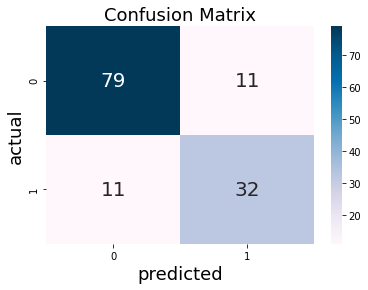

None
Training Accuracy: 0.8796754994343374


Validation Accuracy: 0.8125462911008865


Grid Search Best Params:


{'classifier__max_depth': 70, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}


In [61]:
grid_search(RandomForestClassifier(), rand_forest_parms, KFold())

In [85]:
def grid_search_feature_impotant(classifier, param_grid, cv, print_feat=False):
    search = GridSearchCV(Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', classifier)
    ]), param_grid, cv=cv)
    train_acc = []
    test_acc = []
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        y_hat_t = search.predict(X_t)
        train_acc.append(accuracy_score(y_t, y_hat_t))
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        test_acc.append(accuracy_score(y_val, y_hat_val))
    if print_feat:
        ohe_cols = list(search.best_estimator_.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(input_features=categorical_columns))
        num_feats = list(numerical_columns)
        num_feats.extend(ohe_cols)
        feat_imp = eli5.explain_weights_df(search.best_estimator_.named_steps['classifier'], top=10, feature_names=num_feats)
        print(feat_imp)
    print(evaluation(y_val, y_hat_val))
    print('Training Accuracy: {}'.format(np.mean(train_acc)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_acc)))
    print('\n')
    print('Grid Search Best Params:')
    print('\n')
    print(search.best_params_)

      feature    weight       std
0    Sex_male  0.190116  0.175887
1  Sex_female  0.182379  0.178373
2        Fare  0.167916  0.089604
3         Age  0.126222  0.060285
4    Pclass_3  0.101729  0.089507
5    Pclass_1  0.064395  0.074499
6    Pclass_2  0.028916  0.034874
7  Embarked_S  0.021233  0.021328
8  Embarked_C  0.019788  0.024106
9     SibSp_0  0.019302  0.021712
Recall:  0.7125
Accuracy:  0.8243243243243243
Precision:  0.7808219178082192
F1:  0.7450980392156863


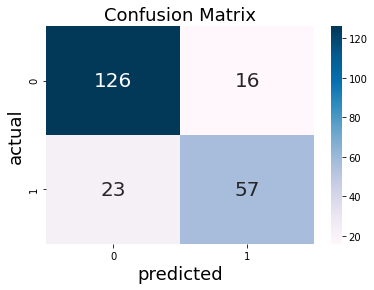

None
Training Accuracy: 0.8538077403245943


Validation Accuracy: 0.8096055696952558


Grid Search Best Params:


{'classifier__max_depth': 70, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}


In [86]:
grid_search_feature_impotant(RandomForestClassifier(), rand_forest_parms, KFold(n_splits=3), True)